## Session 04

#### Many of the points of this lesson come from https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb 



## Introduction

Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

More information at the Matplotlib web page: http://matplotlib.org/

### Let's get started!

In [1]:
import matplotlib
import matplotlib.pyplot as plt

/Users/mac/anaconda/envs/development/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import numpy as np

## MATLAB-like API

In [3]:
from pylab import *

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Example

A simple figure with MATLAB-like plotting API:

### (numpy's linspace: Return evenly spaced numbers over a specified interval)

In [7]:

x = np.linspace(0, 5, 10)
y = x ** 2

In [8]:
x

array([ 0.        ,  0.55555556,  1.11111111,  1.66666667,  2.22222222,
        2.77777778,  3.33333333,  3.88888889,  4.44444444,  5.        ])

In [9]:
y

array([  0.        ,   0.30864198,   1.2345679 ,   2.77777778,
         4.9382716 ,   7.71604938,  11.11111111,  15.12345679,
        19.75308642,  25.        ])

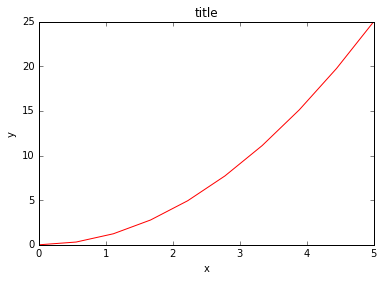

In [12]:
figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('title')
show()

Most of the plotting related functions in MATLAB are covered by the `pylab` module. For example, subplot and color/symbol selection:

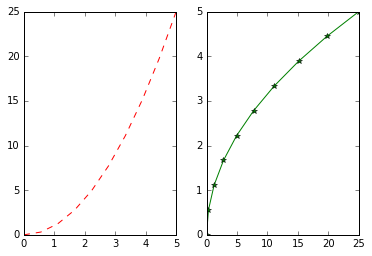

In [16]:
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-');

The good thing about the pylab MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has a minumum of coding overhead for simple plots. 

However, I'd encourrage not using the MATLAB compatible API for anything but the simplest figures.

Instead, I recommend learning and using matplotlib's object-oriented plotting API. It is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with. 

## The matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

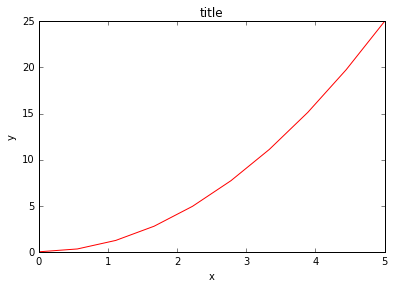

In [17]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [23]:
n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)



# Barplot

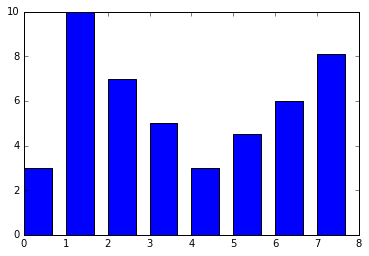

In [28]:
y = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")


fig = plt.gcf()


In [30]:
import seaborn as sns
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


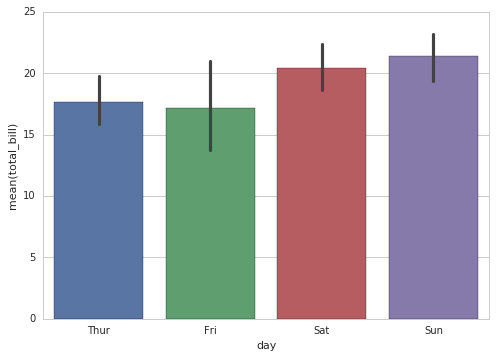

In [29]:

ax = sns.barplot(x="day", y="total_bill", data=tips)


In [86]:
?sns.barplot

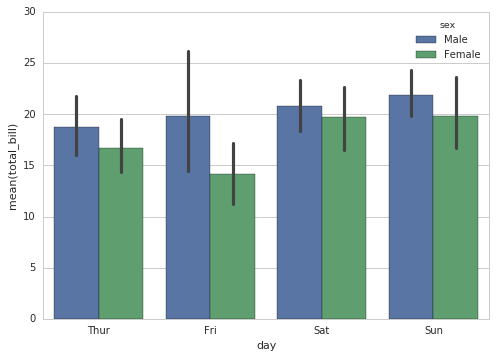

In [36]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)


### Excercise:

1) Change the colour of bars according to time

### Changing pallete

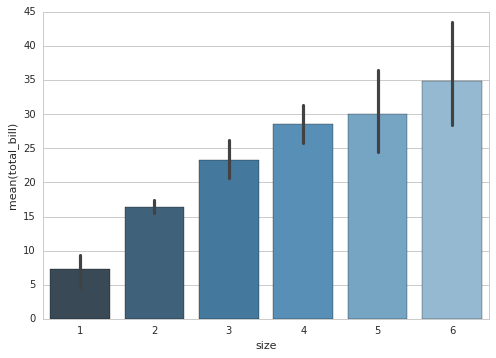

In [41]:
ax = sns.barplot("size", y="total_bill", data=tips,
                  palette="Blues_d")

### (zip)

In [91]:
list1 = ['a', 'b', 'c']
list2 = ['1', '2', '3']
for item1, item2 in zip(list1, list2):
    print(item1, item2)

('a', '1')
('b', '2')
('c', '3')


In [98]:
# Load the example tips dataset
iris = sns.load_dataset("iris")

In [100]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


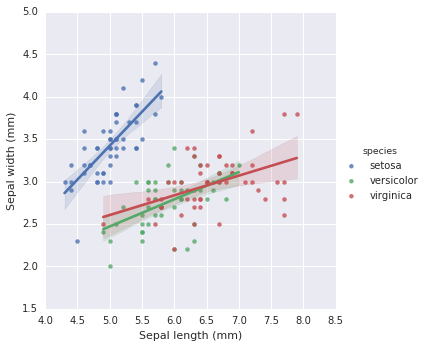

In [99]:


# Plot tip as a function of toal bill across days
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, size=5, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")


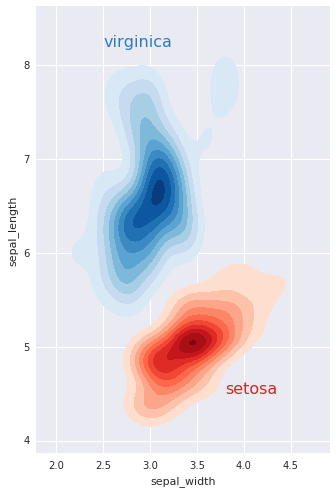

In [101]:
sns.set(style="darkgrid")
iris = sns.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(3.8, 4.5, "setosa", size=16, color=red)


# visualising MRI data!


#### First: visualising a matrix

In [84]:
Z=np.array(((1,2,3,4,5),(4,5,6,7,8),(7,8,9,10,11)))



In [85]:
Z

array([[ 1,  2,  3,  4,  5],
       [ 4,  5,  6,  7,  8],
       [ 7,  8,  9, 10, 11]])

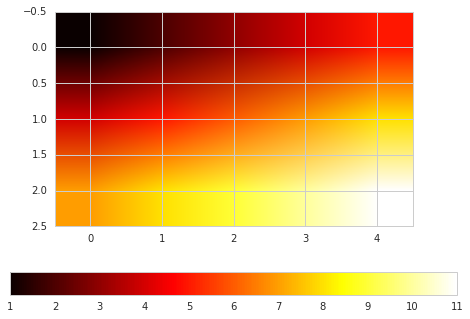

In [63]:
im = plt.imshow(Z, cmap='hot')
plt.colorbar(im, orientation='horizontal')
plt.show()

### Introducing Nibabel

nibabel is a neuroimaing library in Python for working with neuroimaging data (MRI, fMRI, etc). 



In [44]:
import nibabel as nb


In [46]:
img = nb.load('avg152T1_LR_nifti.nii.gz')


In [47]:
img_data = img.get_data()

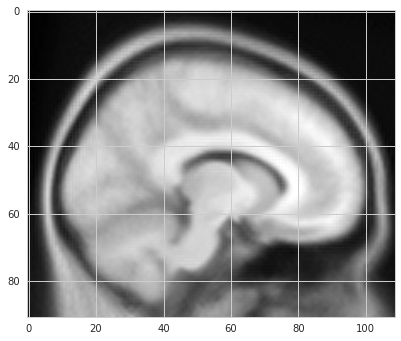

In [56]:
plt.imshow(np.rot90(img_data[50,:, :], k=1),
                        cmap = plt.cm.gray ,  aspect = 'equal', 
                        interpolation = 'sinc')


Changing slice

#### Excercise:

Show slice 65 of the axial view 

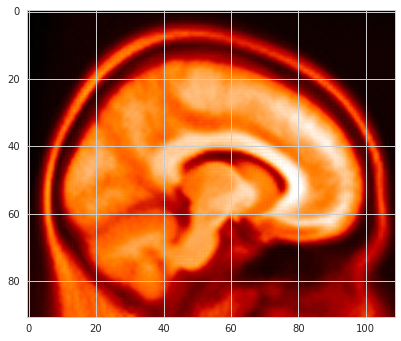

In [83]:
plt.imshow(np.rot90(img_data[50,:, :], k=1),
                        cmap = plt.cm.gist_heat ,  aspect = 'equal', 
                        interpolation = 'sinc')



# more on nibabel

Looking at the header of image

In [81]:

print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='>'
sizeof_hdr      : 348
data_type       : 
db_name         : 
extents         : 0
session_error   : 0
regular         : r
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [ 1.  2.  2.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 255.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : FSL3.2beta
aux_file        : none                   
qform_code      : unknown
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [ -2.   0.   0